# ANL488 Project - Session-based Recommendation systems 

### Data Preparation for the word2vec  

In [1]:
"""
The purpose of this file is to prepare the data for the word2vec model. 
This is general data preparation, further preprocessing will also be in the model file. 

In this file, we basically merge the new product str column (self created) to the browsing file

"""

'\nThe purpose of this file is to prepare the data for the word2vec model. \nThis is general data preparation, further preprocessing will also be in the model file. \n\nIn this file, we basically merge the new product str column (self created) to the browsing file\n\n'

### Import libraries 

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tqdm import tqdm

### Data Prep 

In [4]:
browsing_train = pd.read_csv('C:/Users/Lokesh/Desktop/Submission/1. Data Understanding/Sample_browsing(half).csv')

In [5]:
browsing_train.head()

,SessionId,product_action,product_sku_hash,server_timestamp_epoch_ms,time
0,1,detail,4d45479446a63680c0a03c1f4a31b9e9a6cba5a9dface8...,1550148170683,2019-02-14 12:42:50
1,1,detail,84ab2546942afe5b4c02f1b594e66251d0080da319e957...,1550148176362,2019-02-14 12:42:56
2,1,detail,f0999c89e453bad5ee6900df54d6c04ea04eedd7082adb...,1550148180394,2019-02-14 12:43:00
3,1,detail,c1b20251888221d47da74a5d8cdfb78be942eb51d35371...,1550148228570,2019-02-14 12:43:48
4,1,detail,e3281e3a9ec7ebb3c5483601abb856bc0ccf08dfd74da4...,1550148332921,2019-02-14 12:45:32


In [6]:
browsing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5215542 entries, 0 to 5215541
Data columns (total 5 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   SessionId                  int64 
 1   product_action             object
 2   product_sku_hash           object
 3   server_timestamp_epoch_ms  int64 
 4   time                       object
dtypes: int64(2), object(3)
memory usage: 199.0+ MB


In [7]:
print(browsing_train.nunique())

SessionId                    1640292
product_action                     4
product_sku_hash               46297
server_timestamp_epoch_ms    5201122
time                         3312386
dtype: int64


In [8]:
sku_train = pd.read_csv('new_product_sku.csv')

In [9]:
sku_train.head()

,product_sku_hash,description_vector,category_hash,image_vector,price_bucket,product_sku_str
0,26ce7b47f4c46e4087e83e54d2f7ddc7ea57862fed2e2a...,NaN,NaN,NaN,NaN,A12345z
1,6383992be772b204a9ab75f86c86f5583d1bdd1222952d...,NaN,NaN,NaN,NaN,B12346x
2,a2c3e2430c6ef9770b903ad08fa067a6b2b9db28f06e1b...,"[0.27629122138023376, -0.15763211250305176, 0....",06fa312761d4b39e2f649781514ac69a4c1505c221fc46...,"[340.3592564184389, -220.19025864725685, 154.0...",7.0,C12347c
3,1028ef615e425c328e7b95010dfb1fb93cf63749a1bc80...,"[0.4058118760585785, -0.03595402091741562, 0.2...",115a6a7017ee55752b8487c77dfde92b0d501d10a2e69c...,"[180.3463662921092, 222.702322343354, -8.88703...",8.0,D12348v
4,9870c682d0d52d635501249da0eeaa118fad430b695ea1...,"[-0.3206155300140381, 0.01991105079650879, 0.0...",0665a81d19c89281cc00e7f7d779ded2ed42c933838602...,"[-114.81079301576219, 84.55770104232334, 85.51...",2.0,E12349b


In [10]:
print(sku_train.columns)
print("---------------")
print(sku_train.nunique())

Index(['product_sku_hash', 'description_vector', 'category_hash',
       'image_vector', 'price_bucket', 'product_sku_str'],
      dtype='object')
---------------
product_sku_hash      66386
description_vector    24536
category_hash           174
image_vector          27916
price_bucket             10
product_sku_str       66386
dtype: int64


In [11]:
new_sku= sku_train[['product_sku_hash', 'product_sku_str']]

In [12]:
new_sku.isnull().sum()

product_sku_hash    0
product_sku_str     0
dtype: int64

In [13]:
new_browsing_data1 = pd.merge(browsing_train, new_sku, on='product_sku_hash', how='inner')

In [14]:
print(new_browsing_data1.columns)
print("------------------------")
print(new_browsing_data1.nunique())

Index(['SessionId', 'product_action', 'product_sku_hash',
       'server_timestamp_epoch_ms', 'time', 'product_sku_str'],
      dtype='object')
------------------------
SessionId                    1640292
product_action                     4
product_sku_hash               46297
server_timestamp_epoch_ms    5201122
time                         3312386
product_sku_str                46297
dtype: int64


In [15]:
new_browsing_data1

,SessionId,product_action,product_sku_hash,server_timestamp_epoch_ms,time,product_sku_str
0,1,detail,4d45479446a63680c0a03c1f4a31b9e9a6cba5a9dface8...,1550148170683,2019-02-14 12:42:50,K14951m
1,6106,detail,4d45479446a63680c0a03c1f4a31b9e9a6cba5a9dface8...,1553213249944,2019-03-22 00:07:29,K14951m
2,7980,detail,4d45479446a63680c0a03c1f4a31b9e9a6cba5a9dface8...,1555137171027,2019-04-13 06:32:51,K14951m
3,55822,detail,4d45479446a63680c0a03c1f4a31b9e9a6cba5a9dface8...,1549001231246,2019-02-01 06:07:11,K14951m
4,55822,detail,4d45479446a63680c0a03c1f4a31b9e9a6cba5a9dface8...,1549001276938,2019-02-01 06:07:56,K14951m
...,...,...,...,...,...,...
5215537,3277445,remove,b457fc18898e76ee143f307e50f382e5fc4060b6c4c56c...,1548942570625,2019-01-31 13:49:30,K64022a
5215538,3278868,remove,be176bf61b14b2bb1063e45294e2261bf72674238cd27c...,1550539028151,2019-02-19 01:17:08,K65683f
5215539,3278879,remove,92f2cdbf4fa866fb24320fd064879d094cd5dd4f048bb5...,1551890014780,2019-03-06 16:33:34,H77461f
5215540,3279286,remove,942170acab0d45f537c534d98d5a5415fb596dd3be9a7f...,1551528342582,2019-03-02 12:05:42,C76708d


In [16]:
new_browsing_data1.columns

Index(['SessionId', 'product_action', 'product_sku_hash',
       'server_timestamp_epoch_ms', 'time', 'product_sku_str'],
      dtype='object')

In [17]:
new_browsing = new_browsing_data1.sort_values(['SessionId', 'server_timestamp_epoch_ms'])

In [19]:
new_browsing = new_browsing.reset_index(drop=True)
new_browsing

,SessionId,product_action,product_sku_hash,server_timestamp_epoch_ms,time,product_sku_str
0,1,detail,4d45479446a63680c0a03c1f4a31b9e9a6cba5a9dface8...,1550148170683,2019-02-14 12:42:50,K14951m
1,1,detail,84ab2546942afe5b4c02f1b594e66251d0080da319e957...,1550148176362,2019-02-14 12:42:56,F49464o
2,1,detail,f0999c89e453bad5ee6900df54d6c04ea04eedd7082adb...,1550148180394,2019-02-14 12:43:00,A61636t
3,1,detail,c1b20251888221d47da74a5d8cdfb78be942eb51d35371...,1550148228570,2019-02-14 12:43:48,C19959r
4,1,detail,e3281e3a9ec7ebb3c5483601abb856bc0ccf08dfd74da4...,1550148332921,2019-02-14 12:45:32,F69330u
...,...,...,...,...,...,...
5215537,3280580,detail,45b304cd266d33857dc4387933feb38380f7cbd0dd2dc6...,1553984562456,2019-03-30 22:22:42,B58392x
5215538,3280580,detail,a94a0a26b38fd8c7044be87fea51cf500b9fe61a0d3dea...,1553984613425,2019-03-30 22:23:33,H34363r
5215539,3280580,detail,08657660c499dd08cc37b1a98d88d83b485c494990dd97...,1553984626977,2019-03-30 22:23:46,A73516u
5215540,3280580,detail,3c4926b7c61b4d232dc010cd6ccbd280e63ebbf543ac72...,1553984784419,2019-03-30 22:26:24,D34843k


In [20]:
print(new_browsing.nunique())
print('--------------------')
print(new_browsing.isnull().sum())

SessionId                    1640292
product_action                     4
product_sku_hash               46297
server_timestamp_epoch_ms    5201122
time                         3312386
product_sku_str                46297
dtype: int64
--------------------
SessionId                    0
product_action               0
product_sku_hash             0
server_timestamp_epoch_ms    0
time                         0
product_sku_str              0
dtype: int64


In [24]:
#get sample

get_sample = new_browsing[['SessionId', 'product_sku_hash','product_sku_str', 'server_timestamp_epoch_ms']]

In [25]:
get_sample

,SessionId,product_sku_hash,product_sku_str,server_timestamp_epoch_ms
0,1,4d45479446a63680c0a03c1f4a31b9e9a6cba5a9dface8...,K14951m,1550148170683
1,1,84ab2546942afe5b4c02f1b594e66251d0080da319e957...,F49464o,1550148176362
2,1,f0999c89e453bad5ee6900df54d6c04ea04eedd7082adb...,A61636t,1550148180394
3,1,c1b20251888221d47da74a5d8cdfb78be942eb51d35371...,C19959r,1550148228570
4,1,e3281e3a9ec7ebb3c5483601abb856bc0ccf08dfd74da4...,F69330u,1550148332921
...,...,...,...,...
5215537,3280580,45b304cd266d33857dc4387933feb38380f7cbd0dd2dc6...,B58392x,1553984562456
5215538,3280580,a94a0a26b38fd8c7044be87fea51cf500b9fe61a0d3dea...,H34363r,1553984613425
5215539,3280580,08657660c499dd08cc37b1a98d88d83b485c494990dd97...,A73516u,1553984626977
5215540,3280580,3c4926b7c61b4d232dc010cd6ccbd280e63ebbf543ac72...,D34843k,1553984784419


In [26]:
get_sample.to_csv('sample_browsing_data_str_3.csv', index=False)

### check

In [27]:
check = pd.read_csv('sample_browsing_data_str_3.csv')

In [28]:
check

,SessionId,product_sku_hash,product_sku_str,server_timestamp_epoch_ms
0,1,4d45479446a63680c0a03c1f4a31b9e9a6cba5a9dface8...,K14951m,1550148170683
1,1,84ab2546942afe5b4c02f1b594e66251d0080da319e957...,F49464o,1550148176362
2,1,f0999c89e453bad5ee6900df54d6c04ea04eedd7082adb...,A61636t,1550148180394
3,1,c1b20251888221d47da74a5d8cdfb78be942eb51d35371...,C19959r,1550148228570
4,1,e3281e3a9ec7ebb3c5483601abb856bc0ccf08dfd74da4...,F69330u,1550148332921
...,...,...,...,...
5215537,3280580,45b304cd266d33857dc4387933feb38380f7cbd0dd2dc6...,B58392x,1553984562456
5215538,3280580,a94a0a26b38fd8c7044be87fea51cf500b9fe61a0d3dea...,H34363r,1553984613425
5215539,3280580,08657660c499dd08cc37b1a98d88d83b485c494990dd97...,A73516u,1553984626977
5215540,3280580,3c4926b7c61b4d232dc010cd6ccbd280e63ebbf543ac72...,D34843k,1553984784419


### Data prep2 

In [29]:
new_browsing2 = get_sample

In [30]:
new_browsing2

,SessionId,product_sku_hash,product_sku_str,server_timestamp_epoch_ms
0,1,4d45479446a63680c0a03c1f4a31b9e9a6cba5a9dface8...,K14951m,1550148170683
1,1,84ab2546942afe5b4c02f1b594e66251d0080da319e957...,F49464o,1550148176362
2,1,f0999c89e453bad5ee6900df54d6c04ea04eedd7082adb...,A61636t,1550148180394
3,1,c1b20251888221d47da74a5d8cdfb78be942eb51d35371...,C19959r,1550148228570
4,1,e3281e3a9ec7ebb3c5483601abb856bc0ccf08dfd74da4...,F69330u,1550148332921
...,...,...,...,...
5215537,3280580,45b304cd266d33857dc4387933feb38380f7cbd0dd2dc6...,B58392x,1553984562456
5215538,3280580,a94a0a26b38fd8c7044be87fea51cf500b9fe61a0d3dea...,H34363r,1553984613425
5215539,3280580,08657660c499dd08cc37b1a98d88d83b485c494990dd97...,A73516u,1553984626977
5215540,3280580,3c4926b7c61b4d232dc010cd6ccbd280e63ebbf543ac72...,D34843k,1553984784419


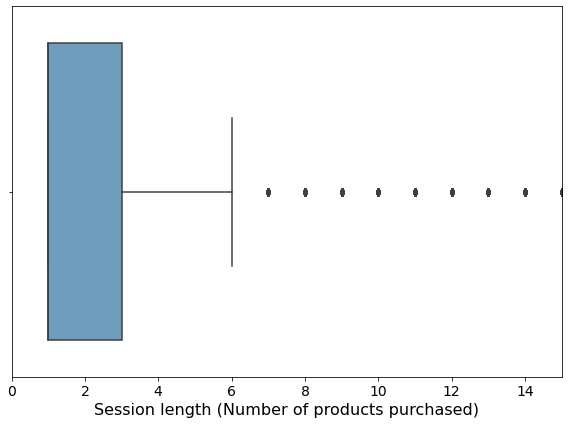

In [32]:
# explore length of sessions

session_lengths = new_browsing2.groupby("SessionId").count()['product_sku_hash'].values

fig = plt.figure(figsize=(8,6))
plt.xticks(fontsize=14)

ax = sns.boxplot(x=session_lengths)

for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .7))
    
plt.xlim(0,15)
plt.xlabel("Session length (Number of products purchased)", fontsize=16);

plt.tight_layout()
plt.savefig("sample_session_lengths.png", transparent=True, dpi=150)


In [33]:
print("Minimum session length: \t", min(session_lengths))
print("Maximum session length: \t", max(session_lengths))
print("Mean session length: \t \t", np.mean(session_lengths))
print("Median session length: \t \t", np.median(session_lengths))
print("Total number of purchases: \t", np.sum(session_lengths))

Minimum session length: 	 1
Maximum session length: 	 181
Mean session length: 	 	 3.1796424051327445
Median session length: 	 	 1.0
Total number of purchases: 	 5215542


In [34]:
# remove sessions less than length of 3 

def preprocess_data1(df, min_session_count=3):

    df.dropna(inplace=True)
    item_counts = df.groupby(["SessionId"]).count()["product_sku_str"]
    df = df[df["SessionId"].isin(item_counts[item_counts >= min_session_count].index)].reset_index(drop=True)
    
    return df

In [35]:
df = preprocess_data1(new_browsing2)
df.head()

C:\Users\Lokesh\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,SessionId,product_sku_hash,product_sku_str,server_timestamp_epoch_ms
0,1,4d45479446a63680c0a03c1f4a31b9e9a6cba5a9dface8...,K14951m,1550148170683
1,1,84ab2546942afe5b4c02f1b594e66251d0080da319e957...,F49464o,1550148176362
2,1,f0999c89e453bad5ee6900df54d6c04ea04eedd7082adb...,A61636t,1550148180394
3,1,c1b20251888221d47da74a5d8cdfb78be942eb51d35371...,C19959r,1550148228570
4,1,e3281e3a9ec7ebb3c5483601abb856bc0ccf08dfd74da4...,F69330u,1550148332921


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870718 entries, 0 to 3870717
Data columns (total 4 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   SessionId                  int64 
 1   product_sku_hash           object
 2   product_sku_str            object
 3   server_timestamp_epoch_ms  int64 
dtypes: int64(2), object(2)
memory usage: 118.1+ MB


In [37]:
df.nunique()

SessionId                     549312
product_sku_hash               45288
product_sku_str                45288
server_timestamp_epoch_ms    3857976
dtype: int64

### Data prep 3

In [38]:
#sessionization
def construct_insession_product_sequences(df, sessionID, productID):
    """ 
     Construct session sequence
    - sessionID: str      column name in the df that represents invididual sessions
    - itemID: str         column name in the df that represents the items within a session

    """
    grp_by_session = df.groupby([sessionID])

    session_sequences = []
    for name, group in grp_by_session:
        session_sequences.append(list(group[productID].values))

    return session_sequences

In [39]:
sample_sessions = construct_insession_product_sequences(df, "SessionId", "product_sku_str")

In [41]:
print(df['SessionId'].nunique())
print("---------Compare--------------")
print(len(sample_sessions))

549312
---------Compare--------------
549312


### Export sample session list 

In [43]:
type(sample_sessions)

list

In [44]:
import json

In [46]:
with open('sample_sessions_1.txt', 'w') as f:
    f.write(json.dumps(sample_sessions))